# Examples: Neural network classifiers
© ExploreAI Academy

In this train, we'll get an overview of Neural Networks as advanced classification algorithms.

## Learning objectives

By the end of this train, you should be able to:
- Obtain a basic understanding of the architecture and fundamental elements of an artificial neural network.
- Understand how to use TensorFlow layers to build a neural network architecture.
- Understand how a model is trained and evaluated using a validation split.
- Implement an effective neural network for classification using keras.

## Introduction

An artificial neural network is a highly parameterised but non-parametric model used for machine learning. We will henceforth refer to it as a neural net or an NN. A NN model can be fit to a set of inputs (X) and outputs (y), like the other regression and classification algorithms we have covered so far. Where a NN differs is in its generalisabilty and the ability to implement non-linear architecture with relative ease. Here, generalisability refers to the ability of a model to adapt properly to new, unseen data drawn from the same distribution as the training data.

## Fundamental components

Neural nets are highly complex structures which we could spend any arbitrary length of time discussing. For the purpose of brevity, we will narrow our focus to four main areas: layers, the neuron, weights, and activation functions.

### Layers

Taking the figure below as a reference, we can see that the first segmentation we can make of a single neural net model is into layers. Data is fed in at the left hand side, into the single input layer. It is then passed to and transformed by some arbitrary (up to the designer) number of what are called *hidden layers*, making up the meat of the internals of the model. The last layer, at the far right, is known as the output layer - this is where we collect the predictions we were hoping for. In classification, output values are typically designed to be probabilities of belonging to each of the classes.  

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-nn-structure.png" alt="sketch-nn-structure" style="width: 450px;"/>

### Neurons

The fundamental unit of which each layer is comprised is known as the neuron. The neuron is effectively a rendezvous point for some number of inputs, where they are all added together and sometimes modified, before being sent on to the next neuron in the network.

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-neuron-diagram.png" alt="sketch-neuron-diagram" width="500px">

As portrayed in the figure above, some number of inputs arrive at the neuron. In the input layer, the input to a neuron is simply a feature value (like someone's age, income, or a pixel value in an image). For neurons in the hidden or output layers, the input to a neuron is the product of the output of another neuron (indicated by $x_1, x_2, ..., x_p$) and a corresponding weight (indicated by $w_1, w_2, ..., w_p$), which we will discuss below.

Neurons can be connected to any number of neurons from the preceding layer, and are usually connected to all of them. Hidden layers whose neurons are each connected to all of the neurons in the preceding layer are called _dense_ or _fully connected_ layers.

Essentially, the only job of the neuron is to sum all of the inputs it receives, add some bias term $\beta$, and ensure that that sum is passed through an activation function. Neurons are also known as _nodes_ or _units_.

### Activation functions

Once all of the inputs arriving at the neuron have been summed, they are passed through an activation function. Activation functions are not set on a per-neuron basis, but rather on a per-layer basis. As we will see below, when we manually add each layer to the network, we need to specify the activation function that goes along with it.

We might consider the role of the activation function to be like a switch, which declares whether or not the output from the neuron in question is activated ("fired"). This firing is dependent on the value coming out of the neuron. Some activation functions take that one step further, and change the magnitude of the output, thereby changing the affect that that neuron's output has on the whole network.

An activation function is simply a mathematical function which takes as its input the output of the neuron. It helps to introduce non-linearity into our model, and for the most part, they normalise the output of the neuron to be between 0 and 1. Two common activation functions are the ReLU (Rectified Linear Unit), and the Softmax. They each have special properties that allow our model to learn non-linear relationships in our data, and are defined as follows:

$$
ReLU(x) =
\begin{cases}
0 &\mbox{if } x < 0 \\
x &\mbox{if } x \geq 0
\end{cases}
$$

$$
Softmax(x)_i = \frac{e^{x_i}}{\sum_i e^{x_i}}
$$

The ReLU function basically just "turns off" a neuron if its input is less than 0, and is linear if its input is greater than zero. The Softmax function is a little different - it applies the exponential function to each of its units, and makes sure the layer as a whole is normalized (i.e., sums to one). We typically use it within the output layer of a NN when we want a categorical probability distribution (such as when predicting which class given input data belongs to). In the figure below, check out the distribution that the Softmax activation function might produce for an input image containing the number 2, from a layer with 10 neurons.

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-softmax.png" alt="sketch-softmax" style="width: 450px;"/>

Other activation functions, such as **sigmoid** and **tanh** do exist, but for now we'll only focus on ReLU and Softmax.

### Weights

For every output from a neuron in the network, there is a weight. A weight is a model parameter; in other words, one of the values which changes as the model learns during the training process - but not one that we have access to changing.

Each weight is a single value, and the corresponding output is multiplied by the weight before it reaches the next neuron. Once the weight and the neuron output have been multiplied together, we can consider that product to be an input to the next neuron.

### A few more definitions

Before we carry on, it will be helpful to expound on a couple more terms that will be used during the modelling process.

- **Deep learning** is simply a subset of machine learning in which we specifically use 'deeper' neural network architectures to perform our modeling. The depth of a neural net refers to the increasing number of hidden layers it possesses.

- An **epoch** refers to the number of times the entire dataset is passed through the network. If we set `epochs=1`, the model will only see each individual observation exactly once.

- **Batch size** refers to the number of observations in a group, known as a batch, which are sent through the network during training before the parameters (weights) are updated. An epoch might require many batches to complete. For example, if we have 1000 observations and a batch size of 100, one epoch will require 10 batches to complete.

- To **flatten** means to convert to a vector of a single dimension. For example, a matrix of dimensions $(3, 16)$ after flattening would have dimensions $(48,)$.

- The term **feedforward** is used to describe a network where the neurons in each layer are only connected to neurons in subsequent layers (and not any preceding layers). Networks in which neurons are connected to neurons from preceding layers, or indeed to themselves, are known as recurrent networks.

- **TensorFlow** is an open-source machine learning library which is used to carry out deep learning tasks. **Keras** is a high-level library provided within TensorFlow. It is possible to write TensorFlow code directly, but Keras makes it much easier and intuitive through APIs and logical syntax. We will use Keras to build models in TensorFlow.

## Architecture of a neural network

Using what we have learned above about neural nets, let's try and put it all together and solve a problem.

Let's say we want to create a network that will recognise handwritten digits in images. It should take as input a 28x28 image (a total of 784 features) and output a 10x1 vector, where the digit predicted to be in the image is indicated by a value of 1 in the position in the vector of that digit. For example, if we input an image of a 2, we would expect an output vector of [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] - the 3rd position, indicating the '2' digit, has a 1 in it.

We want to add two hidden layers in order to introduce some non-linearity into our model. The architecture for this model looks as follows:

<img src="https://github.com/Explore-AI/Public-Data/blob/master/Neural%20Networks/ANN_arc.png?raw=true" width="600px">

Let's break this down:

- The input image is 28x28 pixels, for a total of 784 pixels. Hence the input layer has 784 neurons: one for each pixel value.

- The network has two hidden layers, each with 64 neurons, and each followed by ReLU-type activation functions.

- It has an output layer containing 10 neurons, followed by a softmax activation. This is where we will get the 10x1 vector.

- Finally, a loss is calculated from the output layer (this is usually not included in the final product).

## The MNIST dataset

The MNIST dataset is a classic problem set in machine learning, containing 60,000 28×28 pixel grayscale images of single, handwritten digits from 0 to 9. The task is to classify a given image of a handwritten digit into one of 10 classes.

It is a widely used and deeply understood dataset and, for the most part, is “solved.” Top-performing models are deep learning convolutional neural networks that achieve a classification accuracy of above 99%, with an error rate between 0.4 %and 0.2% on the hold-out test dataset. However for the scope of this train we will intentionally be avoiding CNNs for now.  

In the code below we'll learn how to implement a NN using **Tensorflow** and how how to train it to recognise handwritten images.

**Note:** The code below will run significantly faster if you have access to a GPU. One approach might be to upload this train to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true) and setting the runtime type to "GPU".

## Getting started

Before we can build any neural networks we need to import a few things from Tensorflow.

**Note:** the following installation is quite large ~550MB and may take some time to download and install.

In [ ]:
#! pip install --upgrade tensorflow

In [3]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
from tensorflow.keras.utils import to_categorical

## Preparing the data

Next we load our dataset (MNIST, using `Keras'` dataset utilities).

In [1]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train_copy = X_train
labels = 10 #We can also call this as num_classes
num_classes = 10
#We then need to represent the labels (0-9) in y as one-hot vector
# (e.g., [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


We need to flatten each image before we can pass it into our neural network. We’ll also normalize the pixel values from [0, 255] to [-0.5, 0.5] to make our network easier to train (using smaller, centered values is often better).

In [5]:
#We then flatten the image.. for a model to take it in

#start by normalizing the image
X_train = (X_train/255)-0.5
X_test =(X_test/255)-0.5
#Then flatten the images
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))


## A look at some random digits

It's a good idea to get a sense of the dataset we're working with. Run this code multple times to see new randomly selected digits from the training set.

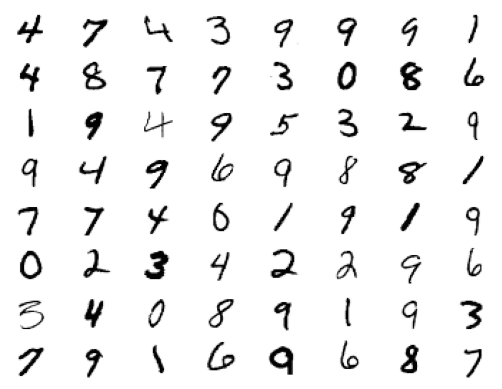

In [ ]:
## Lett us visualize, visualize, visualize
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(X = X_train_copy[randint(0, X_train.shape[0])], cmap = 'Greys')
    #plt.imshow(X_train_copy[randint(0, X_train.shape[0])], cmap= 'Greys')

## Building the model

Every Keras model is either built using the `Sequential` class, which represents a linear stack of layers, or the functional `Model` class, which is more customisable. We’ll be using the simpler Sequential model, since our network is indeed a linear stack of layers.

We start by instantiating a Sequential model.

The **Sequential constructor** takes an array of Keras Layers. Since we’re building a standard feedforward network, we only need the `Dense` layer, which is the regular fully-connected (dense) type.

Let’s add three dense layers.

In [6]:
from tensorflow.keras.layers import Dense
model_ = Sequential(
    [
       Dense(64, activation='relu', input_shape = (784,)),
       Dense(64, activation='relu'),
       Dense(10, activation='softmax',)
    ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model = Sequential([
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
]),

The first two layers have 64 neurons each and use the ReLU activation function. The last layer is a has 10 neurons, one for each class, and uses the Softmax activation function. Remember, neural network classifiers commonly use Softmax as the activation function for the output layer, as it produces an easily interpretable output. Scroll back up to the Softmax graph figure to see why.

The last thing we need to do is tell `Keras` what our network’s input will look like. We can do that by specifying an `input_shape` to the first layer in the sequential model.

In [8]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

## Compiling the model

Before we can begin training, we need to configure the training process. We decide on three key factors during the compilation step.

1. The **optimizer**: an algorithm which directly controls the rate and method by which weights are changed during training. `Keras` has a number of optimizer options; we'll stick with `Adam`, a common gradient-based method.
2. The **loss function**. Since we’re using a Softmax output layer, we’ll use the Cross-Entropy loss. Keras distinguishes between `binary_crossentropy` (two classes) and categorical_crossentropy (>2 classes), so we’ll use the latter as we're trying to classify 10 different digits.
3. A list of **metrics**. Since this is a classification problem, we’ll just have `Keras` report on the accuracy metric. Remember, for a dataset with imbalanced classes, something like _F1-score_ is a better choice.

Here’s what that compilation looks like.

In [9]:
# Compilin' the model
model_.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [10]:
# Compile model
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

## Training and evaluating the model

This code trains and evaluates the model we have created. It also uses `matplotlib` and the `history` object provided by Keras, to report on how the model behaves during training. Here, we are using the `history` object it to plot training and validation accuracy over time.

Training the model is as simple as calling the `.fit()` method and specifying some hyperparameters. There are a lot of possible hyperparameters, but we’ll only manually supply a few:

- The training data (images and labels), commonly known as X and Y, respectively;
- The number of epochs (described above);
- The batch size (described above); and
- The validation split (described below).

Here’s what that looks like.

In [11]:
print (tf.__version__)

2.17.1


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8222 - loss: 0.5923 - val_accuracy: 0.9325 - val_loss: 0.2261
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9343 - loss: 0.2167 - val_accuracy: 0.9585 - val_loss: 0.1398
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9522 - loss: 0.1580 - val_accuracy: 0.9605 - val_loss: 0.1291
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9616 - loss: 0.1259 - val_accuracy: 0.9590 - val_loss: 0.1350
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9636 - loss: 0.1128 - val_accuracy: 0.9688 - val_loss: 0.1161
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9688 - loss: 0.0953 - val_accuracy: 0.9673 - val_loss: 0.1147
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9745 - loss: 0.0829 - val_accuracy: 0.9743 - val_loss: 0.0908
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9734 - loss: 0.0808 - 

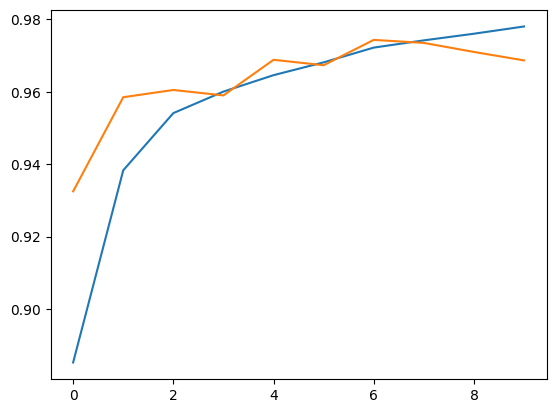

In [12]:
history = model_.fit(X_train, y_train, batch_size=32,
                     epochs=10, verbose = True, validation_split = 0.1)
loss, accuracy = model_.evaluate(X_test, y_test, verbose=True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9791 - loss: 0.0641 - val_accuracy: 0.9683 - val_loss: 0.1177
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9805 - loss: 0.0611 - val_accuracy: 0.9728 - val_loss: 0.1103
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9821 - loss: 0.0547 - val_accuracy: 0.9722 - val_loss: 0.1097
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9819 - loss: 0.0545 - val_accuracy: 0.9693 - val_loss: 0.1261
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9842 - loss: 0.0495 - val_accuracy: 0.9738 - val_loss: 0.1057
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9857 - loss: 0.0438 - val_accuracy: 0.9728 - val_loss: 0.1051
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9842 - loss: 0.0450 - val_accuracy: 0.9707 - val_loss: 0.1158
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9865 - loss: 0.0413 - 

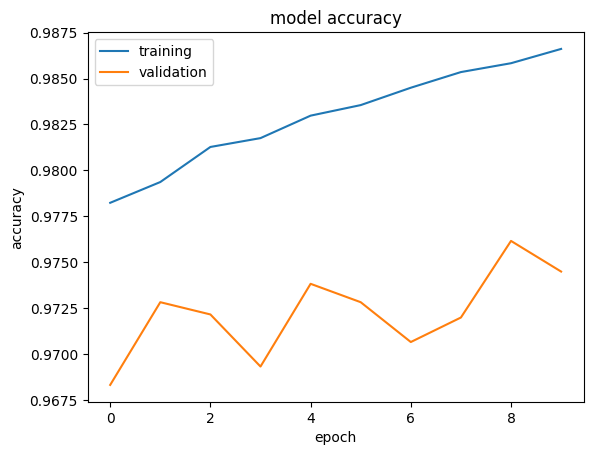

Test loss: 0.114
Test accuracy: 0.973


In [14]:
# Training the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=True, validation_split=0.1)

# Evaluating the model
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Not bad for a relatively simple model.

## What is the role of the `validation_split` argument?

In the `.fit()` method we specified `validation_split=0.1`. What this does is as follows. During each epoch:

1. The bottom 0.1, or 10%, of the observations specified in `x` and `y`, are held back and not used for training.
2. Once training has completed for that epoch, the 10% of rows which were held back are used to validate the model, providing the results for `val_acc` that we see after each epoch.

Using a validation subset gives us insight to guide our model training. Unlike other machine learning models we've studied which are able to appropriately terminate learning after reaching some internal stopping criterion, training a neural network is a *non-convex optimisation task* - which in simple terms means that it is difficult to know if we have an adequate model by just looking at training set performance. This is further complicated by the high capacity nature of neural networks; with often hundreds of thousands of parameters available, these models tend to easily overfit (and in some cases memorize) the data they are trained on.

To make this point practical, by taking a look at the training and validation accuracy versus epoch curves we can see how validation tends to slowly increase and then flatten out. If at any stage we can see the validation curve beginning to drop consistently, it is a sure sign of overfitting and a good place for training to cease. In actual fact, this observation is an important  part of a popular regularization technique know as *Early Stopping*, where we set the number of learning epochs to be a large value, and expect to terminate training when validation performance plateaus. More info about this [here](https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/).  

## Making predictions

We now want to use our model to make a prediction on a given image. Can our model accurately determine the handwritten number depicted?

Run the code below a few times. It will show the image we are trying to predict, as well as the probability distribution that the model outputs. You'll start to get a sense of what the model is seeing as you cycle through some examples.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


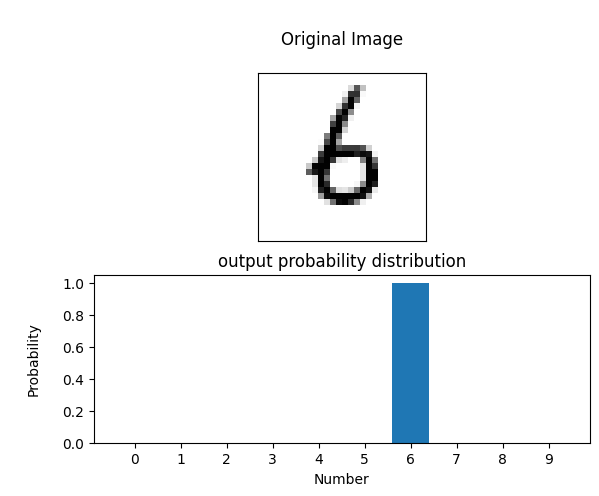

In [23]:
## Let us see how to make some random preds
img_idx = np.random.randint(len(X_train))
prediction = model_.predict(X_train[[img_idx]])[0]
fig, ax = plt.subplots(2, 1)
ax[0].imshow(X_train_copy[img_idx], cmap = 'Greys')
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_title('\nOriginal Image\n')

ax[1].bar(range(0, 10), prediction)
ax[1].set_xticks(range(0, 10))
ax[1].set_xlabel('Number')
ax[1].set_ylabel('\nProbability\n')
ax[1].set_title('\noutput probability distribution')

plt.show()

## Conclusion

In this train we have seen or been introduced to:

- The fundamental ingredients of a neural network, including layers, neurons, weights, activation functions;
- The famous MNIST dataset for image recognition tasks;
- The construction of a neural network for image classification using `keras`;
- The virtue of keeping a validation set to guide model training.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>